# Exploratory Data Analysis (EDA)

In this notebook, we will perform Exploratory Data Analysis (EDA) on the dataset obtained from [Luke Barousse's Hugging Face repository](https://huggingface.co/lukebarousse). The goal of this notebook is to clean and prepare the data for further analysis, focusing on data jobs. We will filter the dataset for Pakistan and a set of comparison countries, then save the results to CSV files for further analysis.

## Steps:
1. Import the dataset.
2. Clean the data by removing duplicates and filtering for data-related jobs.
3. Prepare two subsets of the data:
   - Jobs in Pakistan
   - Jobs in comparison countries (Turkey, Bangladesh, Nigeria, Egypt)
4. Save the cleaned datasets to CSV files for further analysis.


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# get the required dataset
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [52]:
duplicated_rows=df.duplicated().sum()
print(f"There are {duplicated_rows} duplicated rows in the dataset.")

df.isna().sum()

There are 0 duplicated rows in the dataset.


job_title_short               0
job_title                     1
job_location                622
job_via                       0
job_schedule_type          8418
job_work_from_home            0
search_location               0
job_posted_date               0
job_no_degree_mention         0
job_health_insurance          0
job_country                  27
salary_rate              441584
salary_year_avg          448989
salary_hour_avg          454500
company_name                 12
job_skills                74044
job_type_skills           74044
dtype: int64

In [44]:

#handling same job posted on multiple sites
length_df=len(df)
lenght_spam_removed_df=len(df.drop_duplicates(subset=['job_title','company_name']))
print('There are',length_df-lenght_spam_removed_df, 'duplicated job posting in multiple sites')
df=df.drop_duplicates(subset=['job_title','company_name'])
#only look for jobs where jobs are realated to data
df.job_title_short.unique()

# Convert 'job_posted_date' column to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])



There are 277699 duplicated job posting in multiple sites


In [45]:

# Define a regular expression pattern to match "Data", "Analyst", or "Machine Learning" in job titles
pattern = r'(Data|Analyst|Machine Learning)'

# Filter the DataFrame based on 'job_title_short' containing 'Data', 'Analyst', or 'Machine Learning'
df = df[df['job_title_short'].str.contains(pattern, case=False, na=False)]

# Check the result
df.job_title_short.unique()

array(['Senior Data Engineer', 'Data Analyst', 'Data Engineer',
       'Business Analyst', 'Data Scientist', 'Machine Learning Engineer',
       'Senior Data Analyst', 'Senior Data Scientist'], dtype=object)

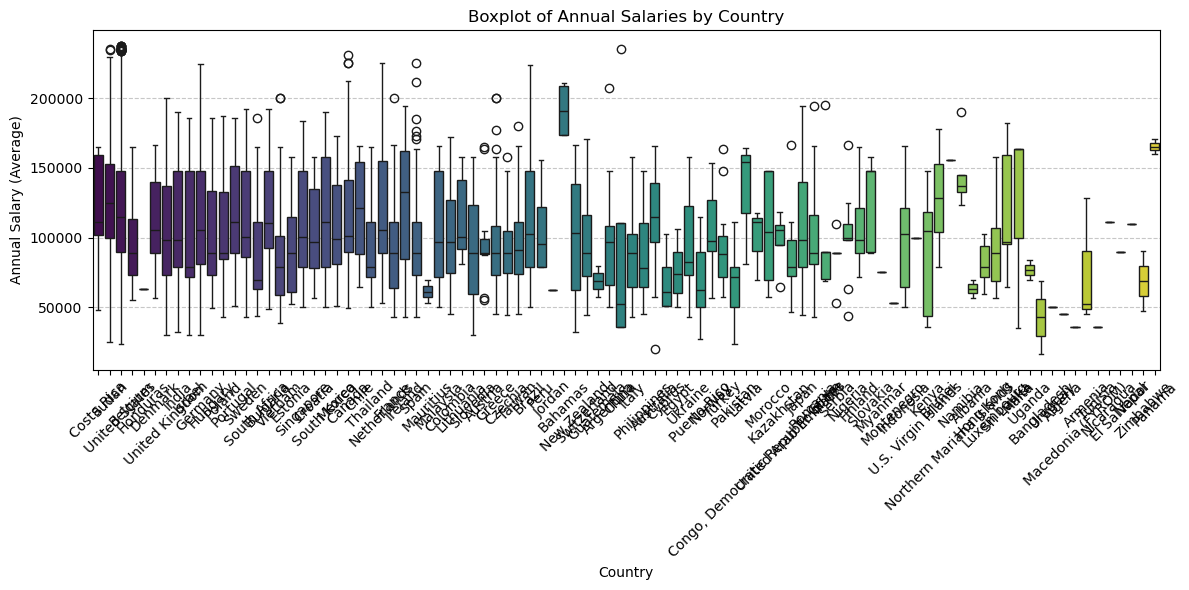

In [46]:
# Outlier detection (example for salary)
q1 = df['salary_year_avg'].quantile(0.25)
q3 = df['salary_year_avg'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_filtered = df[(df['salary_year_avg'] >= lower_bound) & (df['salary_year_avg'] <= upper_bound)]

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='job_country', y='salary_year_avg', data=df_filtered, palette='viridis')
plt.title('Boxplot of Annual Salaries by Country')
plt.xlabel('Country')
plt.ylabel('Annual Salary (Average)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [11]:
#cleaning data
import ast
def convert_job_skills(x):
    '''Convert string to list'''
    try:
        if pd.notna(x):
            return ast.literal_eval(x)
        else:
            return x
    except (ValueError, SyntaxError):
        return x

df['job_skills'] = df['job_skills'].apply(convert_job_skills)
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


0

In [34]:
df.describe()

,job_posted_date,salary_year_avg,salary_hour_avg
count,4957,43.000000,1.0
mean,2023-07-13 08:51:18.607423744,83251.860465,15.0
min,2023-01-01 00:03:34,16500.000000,15.0
25%,2023-03-30 16:22:21,63900.000000,15.0
50%,2023-07-29 03:31:41,79200.000000,15.0
75%,2023-10-25 11:35:27,99575.000000,15.0
max,2023-12-31 17:27:59,166419.500000,15.0
std,NaN,32029.497545,NaN


In [25]:
# Define the countries for comparison
comparison_countries = ['Pakistan', 'Turkey', 'Bangladesh', 'Nigeria', 'Egypt']

# Filter the DataFrame for these countries
df_comparison_countries = df[df['job_country'].isin(comparison_countries)]

# Display basic statistics for the selected countries
print("Basic Statistics for Comparison Countries:")
country_salary_stats = df_comparison_countries.groupby('job_country').agg({
    'salary_year_avg': ['mean', 'std'],
    'job_title_short': 'count'
})
# Rounding 'mean' and 'std' columns for 'salary_year_avg'
country_salary_stats[('salary_year_avg', 'mean')] = country_salary_stats[('salary_year_avg', 'mean')].round(1)
country_salary_stats[('salary_year_avg', 'std')] = country_salary_stats[('salary_year_avg', 'std')].round()

print(country_salary_stats)

# Save the cleaned DataFrame for comparison countries
df_comparison_countries.to_csv('df_comparison_countries.csv', index=False, header=True)

print(f"Cleaned DataFrame for comparison countries saved to 'df_comparison_countries.csv'.")


Basic Statistics for Comparison Countries:
            salary_year_avg          job_title_short
                       mean      std           count
job_country                                         
Bangladesh          42750.0  37123.0             186
Egypt               75847.4  19420.0            1794
Nigeria            100741.1  34693.0             703
Pakistan            69287.5  27970.0            1371
Turkey              94692.6  32394.0             903
Cleaned DataFrame for comparison countries saved to 'df_comparison_countries.csv'.


In [32]:
# Filter the DataFrame for Pakistan
df_pakistan = df[df['job_country'] == 'Pakistan']
# Save the cleaned DataFrame for Pakistan
df_pakistan.to_csv('df_pak.csv', index=False, header=True)

In [38]:
df.isna().sum(axis=0)

job_title_short             0
job_title                   0
job_location                0
job_via                     0
job_schedule_type           7
job_work_from_home          0
search_location             0
job_posted_date             0
job_no_degree_mention       0
job_health_insurance        0
job_country                 0
salary_rate              4907
salary_year_avg          4914
salary_hour_avg          4956
company_name                1
job_skills                879
job_type_skills           879
dtype: int64